In [1]:
import numpy as np 
from numpy import pi
import matplotlib.pyplot as plt
import sciann as sn 
from sciann_datagenerator import * 

---------------------- SCIANN 0.6.4.2 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.4.1 
Python Version: 3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ] 



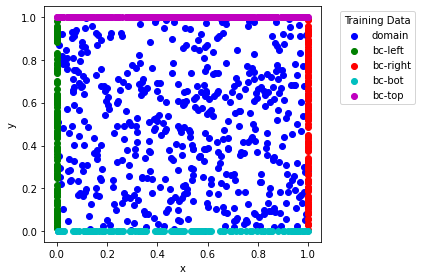

In [2]:
dg = DataGeneratorXY([0.,1.], [0.,1.], num_sample=1000)
dg.plot_data()

In [3]:
lmbd = 1.0
mu = 0.5
Q = 4.0

In [4]:
# Neural Network Setup.
dtype='float32'

x = sn.Variable("x", dtype=dtype)
y = sn.Variable("y", dtype=dtype)

Uxy = sn.Functional("Uxy", [x, y], 4*[40], 'tanh')
Vxy = sn.Functional("Vxy", [x, y], 4*[40], 'tanh')

Sxx = sn.Functional("Sxx", [x, y], 4*[40], 'tanh')
Syy = sn.Functional("Syy", [x, y], 4*[40], 'tanh')
Sxy = sn.Functional("Sxy", [x, y], 4*[40], 'tanh')

C11 = (2*mu + lmbd)
C12 = lmbd
C33 = 2*mu

Exx = sn.diff(Uxy, x)
Eyy = sn.diff(Vxy, y)
Exy = (sn.diff(Uxy, y) + sn.diff(Vxy, x))*0.5

c1 = sn.Tie(Sxx, Exx*C11 + Eyy*C12)
c2 = sn.Tie(Syy, Eyy*C11 + Exx*C12)
c3 = sn.Tie(Sxy, Exy*C33)

Fx = - lmbd*(4*pi**2*sn.cos(2*pi*x)*sn.sin(pi*y) - Q*y**3*pi*sn.cos(pi*x)) \
   - mu*(pi**2*sn.cos(2*pi*x)*sn.sin(pi*y) - Q*y**3*pi*sn.cos(pi*x)) \
   - 8*mu*pi**2*sn.cos(2*pi*x)*sn.sin(pi*y)

Fy = lmbd*(3*Q*y**2*sn.sin(pi*x) - 2*pi**2*sn.cos(pi*y)*sn.sin(2*pi*x)) \
   - mu*(2*pi**2*sn.cos(pi*y)*sn.sin(2*pi*x) + (Q*y**4*pi**2*sn.sin(pi*x))/4) \
   + 6*Q*mu*y**2*sn.sin(pi*x)

Lx = sn.diff(Sxx, x) + sn.diff(Sxy, y) - Fx
Ly = sn.diff(Sxy, x) + sn.diff(Syy, y) - Fy

BC_left_1 = (x==0.)*(Vxy)
BC_left_2 = (x==0.)*Sxx

BC_right_1 = (x==1.)*(Vxy)
BC_right_2 = (x==1.)*Sxx

BC_bot_1 = (y==0.)*(Uxy)
BC_bot_2 = (y==0.)*(Vxy)

BC_top_1 = (y==1.)*(Uxy)
BC_top_2 = (y==1.)*(Syy - (lmbd+2*mu)*Q*sn.sin(pi*x))


targets = [Lx, Ly, c1, c2, c3, 
           BC_left_1, BC_left_2, 
           BC_right_1, BC_right_2, 
           BC_bot_1, BC_bot_2, 
           BC_top_1, BC_top_2]

In [5]:
dg = DataGeneratorXY(X=[0.,1.], Y=[0.,1.], 
                     num_sample=10000,
                     targets=5*['domain'] + 2*['bc-left'] + 2*['bc-right'] + 2*['bc-bot'] + 2*['bc-top'])

input_data, target_data = dg.get_data()

In [6]:
m = sn.SciModel([x, y], targets)

In [7]:
m.train(input_data, target_data, batch_size=100, epochs=100)


Total samples: 12500 
Batch size: 100 
Total batches: 125 

Epoch 1/100
125/125 [==============================] - 3s 4ms/step - batch: 62.0000 - size: 100.0000 - loss: 1526.2682 - sub_10_loss: 1337.6093 - sub_11_loss: 160.0442 - sub_loss: 0.7173 - sub_2_loss: 0.7414 - sub_3_loss: 1.8357 - mul_49_loss: 0.3705 - mul_50_loss: 8.1755 - mul_51_loss: 0.1114 - mul_52_loss: 5.9022 - mul_53_loss: 0.0903 - mul_54_loss: 0.1445 - mul_55_loss: 0.2962 - mul_58_loss: 10.2292
Epoch 2/100
125/125 [==============================] - 1s 4ms/step - batch: 62.0000 - size: 100.0000 - loss: 462.5724 - sub_10_loss: 404.6524 - sub_11_loss: 27.8241 - sub_loss: 2.4226 - sub_2_loss: 1.2516 - sub_3_loss: 3.8624 - mul_49_loss: 0.2676 - mul_50_loss: 7.5440 - mul_51_loss: 0.4077 - mul_52_loss: 7.4307 - mul_53_loss: 0.0751 - mul_54_loss: 0.1083 - mul_55_loss: 0.2553 - mul_58_loss: 6.4706
Epoch 3/100
125/125 [==============================] - 1s 4ms/step - batch: 62.0000 - size: 100.0000 - loss: 81.7267 - sub_10_loss:

125/125 [==============================] - 1s 4ms/step - batch: 62.0000 - size: 100.0000 - loss: 1.1271 - sub_10_loss: 0.4106 - sub_11_loss: 0.1833 - sub_loss: 0.0687 - sub_2_loss: 0.0584 - sub_3_loss: 0.1004 - mul_49_loss: 0.0263 - mul_50_loss: 0.0314 - mul_51_loss: 0.0275 - mul_52_loss: 0.0392 - mul_53_loss: 0.0139 - mul_54_loss: 0.1003 - mul_55_loss: 0.0190 - mul_58_loss: 0.0481
Epoch 22/100
125/125 [==============================] - 1s 4ms/step - batch: 62.0000 - size: 100.0000 - loss: 1.0409 - sub_10_loss: 0.4159 - sub_11_loss: 0.1484 - sub_loss: 0.0677 - sub_2_loss: 0.0466 - sub_3_loss: 0.0878 - mul_49_loss: 0.0245 - mul_50_loss: 0.0287 - mul_51_loss: 0.0279 - mul_52_loss: 0.0391 - mul_53_loss: 0.0116 - mul_54_loss: 0.0885 - mul_55_loss: 0.0178 - mul_58_loss: 0.0365
Epoch 23/100
125/125 [==============================] - 1s 4ms/step - batch: 62.0000 - size: 100.0000 - loss: 1.0358 - sub_10_loss: 0.4275 - sub_11_loss: 0.1394 - sub_loss: 0.0903 - sub_2_loss: 0.0605 - sub_3_loss: 0.

125/125 [==============================] - 1s 4ms/step - batch: 62.0000 - size: 100.0000 - loss: 0.4194 - sub_10_loss: 0.2030 - sub_11_loss: 0.0650 - sub_loss: 0.0344 - sub_2_loss: 0.0240 - sub_3_loss: 0.0168 - mul_49_loss: 0.0028 - mul_50_loss: 0.0120 - mul_51_loss: 0.0076 - mul_52_loss: 0.0256 - mul_53_loss: 0.0014 - mul_54_loss: 0.0113 - mul_55_loss: 0.0039 - mul_58_loss: 0.0117
Epoch 42/100
125/125 [==============================] - 1s 5ms/step - batch: 62.0000 - size: 100.0000 - loss: 0.6086 - sub_10_loss: 0.3365 - sub_11_loss: 0.0926 - sub_loss: 0.0480 - sub_2_loss: 0.0264 - sub_3_loss: 0.0179 - mul_49_loss: 0.0022 - mul_50_loss: 0.0117 - mul_51_loss: 0.0071 - mul_52_loss: 0.0354 - mul_53_loss: 0.0016 - mul_54_loss: 0.0107 - mul_55_loss: 0.0037 - mul_58_loss: 0.0148
Epoch 43/100
125/125 [==============================] - 1s 5ms/step - batch: 62.0000 - size: 100.0000 - loss: 1.4048 - sub_10_loss: 0.9677 - sub_11_loss: 0.1101 - sub_loss: 0.1040 - sub_2_loss: 0.0526 - sub_3_loss: 0.

125/125 [==============================] - 1s 4ms/step - batch: 62.0000 - size: 100.0000 - loss: 0.2356 - sub_10_loss: 0.1161 - sub_11_loss: 0.0397 - sub_loss: 0.0197 - sub_2_loss: 0.0134 - sub_3_loss: 0.0076 - mul_49_loss: 7.5982e-04 - mul_50_loss: 0.0057 - mul_51_loss: 0.0033 - mul_52_loss: 0.0168 - mul_53_loss: 0.0018 - mul_54_loss: 0.0032 - mul_55_loss: 0.0022 - mul_58_loss: 0.0056
Epoch 62/100
125/125 [==============================] - 1s 4ms/step - batch: 62.0000 - size: 100.0000 - loss: 0.8896 - sub_10_loss: 0.5410 - sub_11_loss: 0.1636 - sub_loss: 0.0583 - sub_2_loss: 0.0393 - sub_3_loss: 0.0139 - mul_49_loss: 0.0011 - mul_50_loss: 0.0124 - mul_51_loss: 0.0040 - mul_52_loss: 0.0311 - mul_53_loss: 0.0023 - mul_54_loss: 0.0034 - mul_55_loss: 0.0027 - mul_58_loss: 0.0165
Epoch 63/100
125/125 [==============================] - 1s 5ms/step - batch: 62.0000 - size: 100.0000 - loss: 0.5562 - sub_10_loss: 0.3133 - sub_11_loss: 0.1114 - sub_loss: 0.0363 - sub_2_loss: 0.0275 - sub_3_loss

121/125 [============================>.] - ETA: 0s - batch: 60.0000 - size: 100.0000 - loss: 0.1744 - sub_10_loss: 0.0942 - sub_11_loss: 0.0244 - sub_loss: 0.0153 - sub_2_loss: 0.0089 - sub_3_loss: 0.0048 - mul_49_loss: 3.6065e-04 - mul_50_loss: 0.0035 - mul_51_loss: 0.0018 - mul_52_loss: 0.0122 - mul_53_loss: 0.0021 - mul_54_loss: 0.0014 - mul_55_loss: 0.0019 - mul_58_loss: 0.0034
Epoch 00080: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
125/125 [==============================] - 1s 4ms/step - batch: 62.0000 - size: 100.0000 - loss: 0.1736 - sub_10_loss: 0.0940 - sub_11_loss: 0.0242 - sub_loss: 0.0152 - sub_2_loss: 0.0089 - sub_3_loss: 0.0048 - mul_49_loss: 3.5643e-04 - mul_50_loss: 0.0035 - mul_51_loss: 0.0019 - mul_52_loss: 0.0120 - mul_53_loss: 0.0021 - mul_54_loss: 0.0014 - mul_55_loss: 0.0019 - mul_58_loss: 0.0034
Epoch 81/100
125/125 [==============================] - 1s 4ms/step - batch: 62.0000 - size: 100.0000 - loss: 0.0690 - sub_10_loss: 0.0286 - sub_1

125/125 [==============================] - 1s 5ms/step - batch: 62.0000 - size: 100.0000 - loss: 0.0479 - sub_10_loss: 0.0183 - sub_11_loss: 0.0062 - sub_loss: 0.0034 - sub_2_loss: 0.0029 - sub_3_loss: 0.0031 - mul_49_loss: 2.3061e-04 - mul_50_loss: 0.0020 - mul_51_loss: 0.0013 - mul_52_loss: 0.0049 - mul_53_loss: 0.0020 - mul_54_loss: 8.7486e-04 - mul_55_loss: 0.0016 - mul_58_loss: 0.0011
Epoch 99/100
125/125 [==============================] - 1s 5ms/step - batch: 62.0000 - size: 100.0000 - loss: 0.0601 - sub_10_loss: 0.0272 - sub_11_loss: 0.0075 - sub_loss: 0.0041 - sub_2_loss: 0.0032 - sub_3_loss: 0.0031 - mul_49_loss: 2.4847e-04 - mul_50_loss: 0.0020 - mul_51_loss: 0.0014 - mul_52_loss: 0.0056 - mul_53_loss: 0.0020 - mul_54_loss: 8.5619e-04 - mul_55_loss: 0.0016 - mul_58_loss: 0.0013
Epoch 100/100
125/125 [==============================] - 1s 5ms/step - batch: 62.0000 - size: 100.0000 - loss: 0.0554 - sub_10_loss: 0.0231 - sub_11_loss: 0.0074 - sub_loss: 0.0040 - sub_2_loss: 0.0032

In [8]:
x_test, y_test = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))

In [9]:
u_test = Uxy.eval([x_test, y_test])
v_test = Vxy.eval([x_test, y_test])
sxx_test = Sxx.eval([x_test, y_test])
syy_test = Syy.eval([x_test, y_test])
sxy_test = Sxy.eval([x_test, y_test])

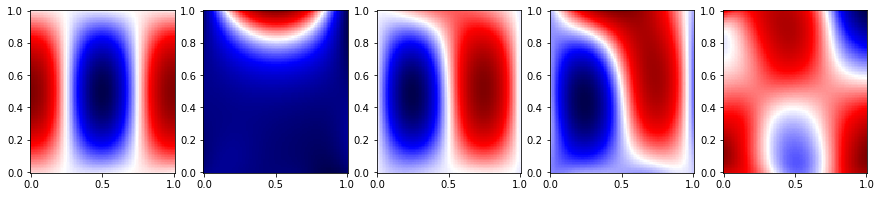

In [10]:
fig,ax = plt.subplots(1,5,figsize=(15,3))
ax[0].pcolor(x_test, y_test, u_test, cmap='seismic', shading='auto')
ax[1].pcolor(x_test, y_test, v_test, cmap='seismic', shading='auto')
ax[2].pcolor(x_test, y_test, sxx_test, cmap='seismic', shading='auto')
ax[3].pcolor(x_test, y_test, syy_test, cmap='seismic', shading='auto')
ax[4].pcolor(x_test, y_test, sxy_test, cmap='seismic', shading='auto')
plt.show()